In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
GOOG_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/GOOG_predictions_RFC.csv", index_col=0)


In [3]:
GOOG_predictions.head()

Date  Predictions
0  2019-07-31            1
1  2019-06-28            0
2  2019-05-31            1
3  2019-04-30            1
4  2019-03-29            0

In [4]:
GOOG_predictions.Date = pd.to_datetime(GOOG_predictions.Date, format="%Y-%m-%d")

In [5]:
GOOG_predictions['Predictions'] = GOOG_predictions['Predictions'].shift(-1)


In [6]:
GOOG_predictions = GOOG_predictions.dropna()


In [7]:
GOOG_predictions = GOOG_predictions[::-1]

In [8]:
GOOG_predictions.head(10)

Date  Predictions
112 2010-03-31          1.0
111 2010-04-30          0.0
110 2010-05-28          1.0
109 2010-06-30          1.0
108 2010-07-30          1.0
107 2010-08-31          1.0
106 2010-09-30          1.0
105 2010-10-29          0.0
104 2010-11-30          1.0
103 2010-12-31          1.0

In [9]:
GOOG_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/GOOG/GOOG_monthly.csv", index_col =0)

In [10]:
GOOG_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
GOOG_predictions = GOOG_predictions.set_index("Date")

In [12]:
GOOG_monthly.tail()

Open      High      Low    Close     Volume
2005-01-31  98.3314  102.2667  87.8158  97.4448  411865800
2004-12-31  90.6353   99.5668  83.9204  96.0350  291772100
2004-11-30  96.4136  100.4236  80.3538  90.6502  557267200
2004-10-29  65.1558   99.6017  64.2093  94.9641  516060900
2004-09-30  51.1582   67.2579  49.2853  64.5580  213503200

In [13]:
GOOG_final_df = pd.merge(GOOG_predictions, GOOG_monthly, right_index=True, left_index=True)

In [14]:
GOOG_final_df.index = pd.to_datetime(GOOG_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

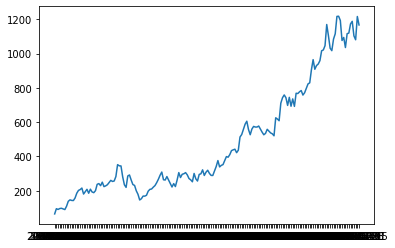

In [16]:
plt.plot(GOOG_monthly.index[::-1], GOOG_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0 and (position.is_short != True)  :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(GOOG_final_df, Binary_Classification_1d, cash=10000, commission=.02)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        3409 days 00:00:00
Exposure [%]                               97.3306
Equity Final [$]                            165979
Equity Peak [$]                             165979
Return [%]                                 1559.79
Buy & Hold Return [%]                      330.682
Max. Drawdown [%]                         -11.8079
Avg. Drawdown [%]                         -6.05267
Max. Drawdown Duration           396 days 00:00:00
Avg. Drawdown Duration           119 days 00:00:00
# Trades                                        47
Win Rate [%]                               74.4681
Best Trade [%]                             34.0829
Worst Trade [%]                           -7.58801
Avg. Trade [%]                             6.25895
Max. Trade Duration              273 days 00:00:00
Avg. Trade Duration               71 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/RFC/GOOG_RFC_Equity.csv")

In [25]:
df

Equity
2010-04-30   10000.000000
2010-05-28   10564.959359
2010-06-30    9680.792227
2010-07-30   10548.897893
2010-08-31    9791.103296
2010-09-30   11439.632703
2010-10-29   13352.291081
2010-11-30   14414.041124
2010-12-31   14747.930922
2011-01-31   14906.592452
2011-02-28   14497.942750
2011-03-31   15146.425835
2011-04-29   16184.882298
2011-05-31   15345.501561
2011-06-30   14688.775248
2011-07-29   17511.486582
2011-08-31   19380.368853
2011-09-30   18102.557033
2011-10-31   20830.038321
2011-11-30   21067.286688
2011-12-30   22702.010069
2012-01-31   20389.635808
2012-02-29   21730.169521
2012-03-30   22538.220920
2012-04-30   23317.855211
2012-05-31   22026.930483
2012-06-29   20949.997544
2012-07-31   22275.495162
2012-08-31   24109.697195
2012-09-28   26552.375086
...                   ...
2017-02-28   63862.680362
2017-03-31   62208.746339
2017-04-28   67937.986201
2017-05-31   72354.900179
2017-06-30   75664.225814
2017-07-31   75416.775195
2017-08-31   73535.150055
2017-09-29   73327.701060
2017-10-31   77726.093989
2017-11-30   78090.779097
2017-12-29   80001.362085
2018-01-31   89446.477024
2018-02-28   91481.589925
2018-03-29   96948.793400
2018-04-30   95193.289450
2018-05-31  101524.350133
2018-06-29  104393.258211
2018-07-31  113901.077837
2018-08-31  113554.367197
2018-09-28  115822.104675
2018-10-31  126527.807086
2018-11-30  126283.782969
2018-12-31  119496.677248
2019-01-31  128815.389557
2019-02-28  129225.015965
2019-03-29  135385.566364
2019-04-30  137135.998084
2019-05-31  143948.443854
2019-06-28  147457.034212
2019-07-31  165978.688683

[112 rows x 1 columns]